In [2]:
import torch
import math
import torchvision
from torchvision import transforms

In [4]:
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-13.3-arm64-arm-64bit
Tensor Flow Version: 2.11.0
Keras Version: 2.11.0

Python 3.9.11 (main, Mar 29 2022, 14:04:34) 
[Clang 12.0.0 ]
Pandas 1.5.3
Scikit-Learn 1.2.2
SciPy 1.10.1
GPU is available


In [7]:
import tensorflow_datasets as tfds


In [8]:
ds = tfds.load('imagenet2012_multilabel', split='validation')

2023-03-28 14:19:47.467324: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


AssertionError: Manual directory /Users/jamahusseinmohamud/tensorflow_datasets/downloads/manual does not exist or is empty. Create it and download/extract dataset artifacts in there using instructions:
manual_dir should contain `ILSVRC2012_img_val.tar` file.
You need to register on http://www.image-net.org/download-images in order
to get the link to download the dataset.

In [64]:
import numpy as np

multilabel_matrix = torch.zeros((len(celebData), len(celebData.attr_names)))
i = 0
batch_size = 4
for image, labels in trainloader:
    multilabel_matrix[i:i+batch_size] = labels
    i += batch_size

# multilabel_matrix[4:4+batch_size]

In [68]:
len(celebData)

162770

In [69]:
correlation_matrix = np.corrcoef(np.array(multilabel_matrix), rowvar = False)
correlation_matrix

array([[ 1.        , -0.15779338, -0.06623495, ..., -0.11514774,
         0.09851386,  0.00696706],
       [-0.15779338,  1.        ,  0.255636  , ...,  0.21734905,
        -0.13067976,  0.15247757],
       [-0.06623495,  0.255636  ,  1.        , ...,  0.07152975,
        -0.15730098,  0.38855675],
       ...,
       [-0.11514774,  0.21734905,  0.07152975, ...,  1.        ,
        -0.1039266 ,  0.02035452],
       [ 0.09851386, -0.13067976, -0.15730098, ..., -0.1039266 ,
         1.        , -0.25128881],
       [ 0.00696706,  0.15247757,  0.38855675, ...,  0.02035452,
        -0.25128881,  1.        ]])

In [74]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

corr_df = pd.DataFrame(correlation_matrix)
corr_df.columns = celebData.attr_names

Text(0.5, 1.0, 'Train Multi-label correlation Heatmap')

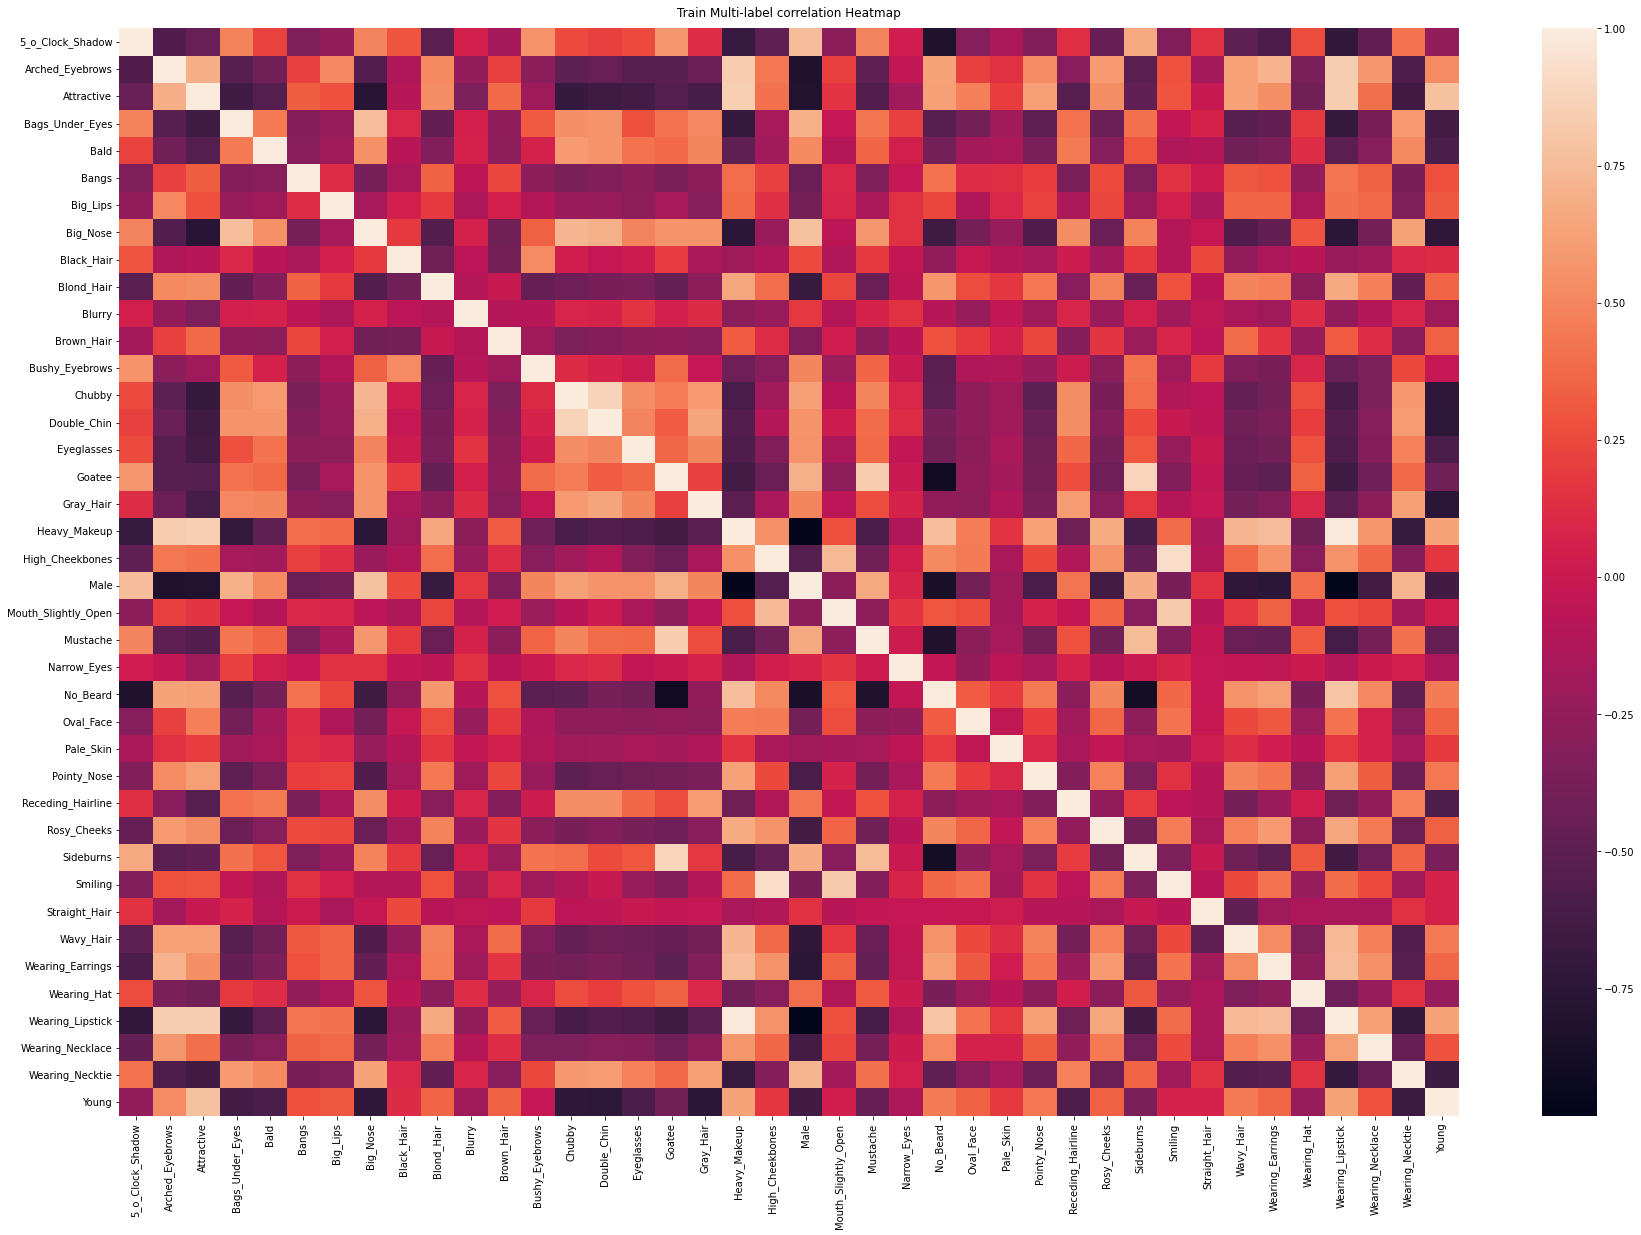

In [75]:
# Increase the size of the heatmap.
plt.figure(figsize=(30, 20))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(corr_df.corr(), annot=False)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Train Multi-label correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [76]:
label_names_dict = {i:k for i,k in enumerate(celebData.attr_names)}

In [ ]:
import networkx as nx
plt.figure(figsize=(20, 10))

def show_graph_with_labels(adjacency_matrix, mylabels):
    # rows, cols = np.where(adjacency_matrix != 0)
    rows, cols = np.where(np.abs(adjacency_matrix) > .25)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, node_color='r', edge_color='b', font_size=16, \
            alpha = 1, font_color = 'black',labels=mylabels, with_labels=True, \
            font_weight = 'bold', style='dashed')
    plt.show()

show_graph_with_labels(correlation_matrix, label_names_dict)